# Assignment 1: Economic Conditions and its Impact on Libertarian Vote Share

For my research question I wanted to look at the impact of various economic conditions (independent variables) and their effect on the vote share for the Libertarian party across the different counties in the United States. The explanatory variables include median household income (I did not choose average household income, as outliers can have skew the results), unemployment rate, and deaths from shooting. The dependent variable is the share of votes for the Libertarian party in a county.

I chose my explanatory variables as I thought that they were all relevant in determining how well-off a county is, with the median household income and unemployment rate being indicative of the material conditions of a county (high median household income and low unemployment rate suggesting a well-off community). Additionally, the inclusion of deaths from shooting was included ~ with the idea that more violence in a community might prompt people to support the idea of community militias suggested by the Libertarian party.

The reason I chose the Libertarian party instead of either mainstream political parties (Republicans and Democrats) is that the Libertarian party is the largest third party organization, and thus I believe serves as a way for voters to demonstrate their dissatisfaction with the main parties (I expect that worse material conditions should have an increased share of votes for the Libertarian party).

# 1. Introduction

For my project I was interested in seeing how well the most popular third party (Libertarians) did in the 2016 elections. Instead of looking at the frequently studied parties (Republican and Democrats). Apart from the people who support Libertarians for ideological reasons, those that are dissatisfied with the other parties will tend to follow the Libertarians as they are the next most popular option. Thus by studying the Libertarian party's vote share, I wanted to determine if worse material conditions benefited the Libertarians (dissatisfaction with the two mainstream parties).

The datasets that I used for this project were all from Kaggle. I used the 2016 election result data at the precinct level (aggregated to the county level), which was made by Bojan Tunguz. From this data set, I was able to calculate the vote share for libertarians (# of votes for libertarian by county/ # of total cotes by county). The median household income data set was also on Kaggle, and was provided by the Golden Oak Research Group. This was ona city level, and thus had to be aggregated to the county level, where we took the median of the value for each county. The unemployment rate data set was taken made by Noah Weber as a part of his analysis of world crime on Kaggle. Lastly, there is the deaths by shootings by county which was provided by Ahmed Eltom on Kaggle.

For the explanatory variables, we look at the data from 2015 ~ as it is more readily available, and also because I believe that voters will have had enough time to process the quality of life and events from the past year and allow these experiences to influence their decision for the upcoming vote in 2016.

The results we obtained seem to suggest that material conditions (unemployment rate and median household income) of the county does not seem to have any bearing on how well the Libertarian party did in the 2016 Presidential Election vote, whereas the deaths caused by shootings seemed to have a negative impact on the Libertarian party's performance. 

However, given that the Libertarian party, despite being the most popular third party, is still 'too marginal'. Thus, instead of looking at only the Libertarian party I have decided to instead include the other 'independent' parties, and treat them as one group. Despite having different ideologies, and not necessarily winning even if above 50% of vote shares (since they are apart of separate parties), I think it is still a valuable exercise to look into, as the total vote share belonging to independents could indicate the overall dissatisfaction towards the mainstream political parties. I still believe that this is a worthwhile topic, as it is not researched as frequently as the election outcomes for either Democrats or Republicans.

Additionally, I am now instead looking at the presidential outcomes instead of the congress results. This in turn has given me more observations, as indepedent and Libertarian parties are smaller in size, and thus do not have as much congress representation


In [1]:
# Import packages 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as mplc
import matplotlib.patches as patches

# 2. Data Cleaning and Loading

With the datasets containing information on election outcomes, median household income, unemployment rate, and deaths by shooting, we now move on to merge them. 

Since the election outcomes were on a precinct level and had results for all parties, I had to filter for the Libertarian party's results, and then groupby state, county and party (this was because I wanted to make sure that if any counties shared names but were in different states, they would not sum up the values for each other). This would sum up the total votes by Libertarians. I made another dataframe, but this one did not filter out non-Libertarian parties, and was groupby on state and county (thus the sum is the total number of votes by county). I then conduct a left join (with the libertarian votes df on the left, and the total votes df on the right), then I am able to get the share of votes for the Libertarian party by conducting division (# of total Libertarian votes/# of total votes).

For the aggregation of the explanatory variables, we groupby state and county (except for unemployment rate, where we specify year as well, before dropping all non 2015 observations). We take the mean of unemployment rates and gun deaths by county, but stick to median for the median household income (when done with the mean, household income skews upwards by a significant amount).

We then conduct a left join of the explanatory variable dataframes onto the election outcome dataframe, joining on the state and county.

We notice that there were missing data in the median household income (taking on NaN value), and also taking on a value of 0. I treated the 0 values as 'missing' data, since it is not possible to have a median household income of 0 across an entire county.


In [2]:
# County level (convert to this at least!!!)
pres_df = pd.read_csv(r'C:\Users\huang\OneDrive\Documents\ECO225\2016-precinct-president.csv', encoding= 'ISO-8859-1')
pres_df = pres_df[['state', 'county_name', 'party', 'votes']]
# Total votes per county, next we want the sum of party specific vote, then merge to gather 
# share of votes!!! WAAAAGH!!!
# We are only looking at lolbertarian share of votes.
pres_df_sum = pres_df.groupby(['state','county_name']).sum()
pres_df_sum_party = pres_df[(pres_df['party'] == 'independent') | (pres_df['party'] == 'libertarian')]
# pres_df_sum_party.head()
# Alaska is a lost cause ~ We do not seem to have county level data for income, and unemployment rates...
# We are now treating independent and libertarian parties as one and the same
pres_df_sum_party = pres_df_sum_party.groupby(['state','county_name']).sum()
pres_df_lib = pd.merge(pres_df_sum_party, pres_df_sum, how = 'left', left_on = ['state', 'county_name'], 
                       right_on = ['state', 'county_name'])

# pres_df_lib = pres_df_lib[pres_df_lib['party'] == 'libertarian']
# test = pres_df[pres_df['party'] == 'libertarian']
# test[test['state'] == 'Arkansas']
pres_df_ind = pres_df[['state', 'county_name']]
# For some reason this is making multiple rows??? 
pres_df_lib = pd.merge(pres_df_lib, pres_df_ind, how = 'left', on =['state', 'county_name'])
pres_df_lib

C:\Users\huang\AppData\Local\Temp\ipykernel_33848\3564084071.py:2: DtypeWarning: Columns (13,17,19,31,32) have mixed types. Specify dtype option on import or set low_memory=False.
  pres_df = pd.read_csv(r'C:\Users\huang\OneDrive\Documents\ECO225\2016-precinct-president.csv', encoding= 'ISO-8859-1')


,state,county_name,votes_x,votes_y
0,Alabama,Autauga County,651,37000
1,Alabama,Autauga County,651,37000
2,Alabama,Autauga County,651,37000
3,Alabama,Autauga County,651,37000
4,Alabama,Autauga County,651,37000
...,...,...,...,...
1845733,Wyoming,Weston County,124,3526
1845734,Wyoming,Weston County,124,3526
1845735,Wyoming,Weston County,124,3526
1845736,Wyoming,Weston County,124,3526


In [3]:
# Our dependent variable should be the share of votes for libertarians ~ I am personally interested in this, and some 
# other state specific factors ~ some that come to mind immediately are economic conditions, demographics and so on

# One of the explanatory variables will be unemployment rate in the states...
unemp_df = pd.read_csv(r'C:\Users\huang\OneDrive\Documents\ECO225\output.csv', encoding= 'ISO-8859-1')
unemp_df.head(10)
unemp_df = unemp_df[unemp_df['Year'] == 2015]
unemp_df = unemp_df.groupby(['State', 'County', 'Year']).mean()
# Looking at the county leve
unemp_df.head()

Rate
State   County         Year          
Alabama Autauga County 2015  5.250000
        Baldwin County 2015  5.491667
        Barbour County 2015  8.941667
        Bibb County    2015  6.608333
        Blount County  2015  5.408333

In [4]:
hhinc_df = pd.read_csv(r'C:\Users\huang\OneDrive\Documents\ECO225\kaggle_income.csv', encoding= 'ISO-8859-1')
hhinc_df = hhinc_df[['State_Name', 'County', 'Median']]
hhinc_df = hhinc_df.groupby(['State_Name', 'County']).median()
# It seems that SweetWater County simply has no hh income recorded ~ 0...

In [5]:
# We merge the explanatory variable tables with the results table:
pres_df_merged = pd.merge(pres_df_lib, unemp_df['Rate'], how = 'left',left_on = ['county_name'], right_on = ['County'])
pres_df_merged = pd.merge(pres_df_merged , hhinc_df, how = 'left', left_on = ['county_name'], right_on = ['County'])
# pres_df_merged = pres_df_merged.groupby(['state', 'county_name']).mean()
# This seems to have fixed the problem

In [6]:
# We now want to get the vote share for the libertarians.
# pres_df_merged['vote_share_lib'] = pres_df_merged['votes_x']/pres_df_merged['votes_y']
pres_df_merged

,state,county_name,votes_x,votes_y,Rate,Median
0,Alabama,Autauga County,651,37000,5.250,40580.0
1,Alabama,Autauga County,651,37000,5.250,40580.0
2,Alabama,Autauga County,651,37000,5.250,40580.0
3,Alabama,Autauga County,651,37000,5.250,40580.0
4,Alabama,Autauga County,651,37000,5.250,40580.0
...,...,...,...,...,...,...
50313019,Wyoming,Weston County,124,3526,3.325,300000.0
50313020,Wyoming,Weston County,124,3526,3.325,300000.0
50313021,Wyoming,Weston County,124,3526,3.325,300000.0
50313022,Wyoming,Weston County,124,3526,3.325,300000.0


In [7]:
# We will simply remove cases where the median income by county is NaN or 0 ~ makes no sense that median income can be 0...
pres_df_merged.dropna(subset = ['Median'], inplace = True)
pres_df_merged = pres_df_merged[pres_df_merged['Median'] != 0]
pres_df_merged

,state,county_name,votes_x,votes_y,Rate,Median
0,Alabama,Autauga County,651,37000,5.250,40580.0
1,Alabama,Autauga County,651,37000,5.250,40580.0
2,Alabama,Autauga County,651,37000,5.250,40580.0
3,Alabama,Autauga County,651,37000,5.250,40580.0
4,Alabama,Autauga County,651,37000,5.250,40580.0
...,...,...,...,...,...,...
50313019,Wyoming,Weston County,124,3526,3.325,300000.0
50313020,Wyoming,Weston County,124,3526,3.325,300000.0
50313021,Wyoming,Weston County,124,3526,3.325,300000.0
50313022,Wyoming,Weston County,124,3526,3.325,300000.0


In [8]:
# We can now conduct visualizations...
# But another check for missing values perhaps?
pres_df_merged['Rate'].isnull().sum()
# 17 null values for rate ~ drop those as well 
pres_df_merged.dropna(subset = ['Rate'], inplace = True)
pres_df_merged

C:\Users\huang\AppData\Local\Temp\ipykernel_33848\332447205.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pres_df_merged.dropna(subset = ['Rate'], inplace = True)


,state,county_name,votes_x,votes_y,Rate,Median
0,Alabama,Autauga County,651,37000,5.250,40580.0
1,Alabama,Autauga County,651,37000,5.250,40580.0
2,Alabama,Autauga County,651,37000,5.250,40580.0
3,Alabama,Autauga County,651,37000,5.250,40580.0
4,Alabama,Autauga County,651,37000,5.250,40580.0
...,...,...,...,...,...,...
50313019,Wyoming,Weston County,124,3526,3.325,300000.0
50313020,Wyoming,Weston County,124,3526,3.325,300000.0
50313021,Wyoming,Weston County,124,3526,3.325,300000.0
50313022,Wyoming,Weston County,124,3526,3.325,300000.0


In [9]:
# We want to add in gun deaths in each county ~ ADD IT IN!!!!!
gun_df = pd.read_csv(r'C:\Users\huang\OneDrive\Documents\ECO225\gun_deaths_us_1999_2019.csv', encoding= 'ISO-8859-1')
# Only for the year 2015 ~ the year preceeding the presidential election
gun_df = gun_df[gun_df['Year'] == 2015]
# Group by county, also keep only the deaths and such 
gun_df = gun_df[['State_Name', 'County', 'Deaths']]
gun_df = gun_df.groupby(['State_Name', 'County']).mean()
# Join with the main table, replace missing with no gun deaths...
pres_df_merged = pd.merge(pres_df_merged, gun_df, how = 'left', 
                          left_on = ['state', 'county_name'], right_on = ['State_Name', 'County'])
pres_df_merged['Deaths'] = pres_df_merged['Deaths'].fillna(0)
pres_df_merged = pres_df_merged.groupby(['state', 'county_name']).mean()
pres_df_merged['vote_share_lib'] = pres_df_merged['votes_x']/pres_df_merged['votes_y']
pres_df_merged

votes_x  votes_y      Rate         Median  Deaths  \
state   county_name                                                          
Alabama Autauga County     651.0  37000.0  5.250000   40580.000000     0.0   
        Barbour County     111.0  16512.0  8.150000   29166.000000     0.0   
        Blount County      426.0  38788.0  5.350000   44609.000000    14.0   
        Butler County       78.0  13415.0  5.022917   40684.416667     0.0   
        Calhoun County    1378.0  73438.0  6.534259   24322.750000    33.0   
...                          ...      ...       ...            ...     ...   
Wyoming Platte County      222.0   4529.0  3.655556  217227.000000     0.0   
        Sheridan County    919.0  14510.0  3.316667   64759.000000     0.0   
        Teton County       900.0  12627.0  3.722222   56442.500000     0.0   
        Uinta County       581.0   8470.0  4.883333   83387.000000     0.0   
        Weston County      124.0   3526.0  3.325000  300000.000000     0.0   

                         vote_share_lib  
state   county_name                      
Alabama Autauga County         0.017595  
        Barbour County         0.006722  
        Blount County          0.010983  
        Butler County          0.005814  
        Calhoun County         0.018764  
...                                 ...  
Wyoming Platte County          0.049017  
        Sheridan County        0.063336  
        Teton County           0.071276  
        Uinta County           0.068595  
        Weston County          0.035167  

[1920 rows x 6 columns]

# 3. Summary Statistics Tables
For the summary statistics ~ we have 767 observations in total (after removing missing values, or values that don't make sense).

The dependent variable vote share for the Libertarian party, we observe that the mean value of the vote share is around 4.9%, and that the 75 percentile is at 5.4% of the vote share ~ thus indicating that the Libertarian party usually received a very small portion of the votes in each county. This is to be expected as it is a third party and thus does not have as much funding and ability to win support.

For the median income of households in the counties where the Libertarian party is active, we observe that the mean income is around 73000 USD, even though the there is a sizable portion of the median household income being a bit lower (looking at the 50th percentile of 48800 USD as the median household income). There appears to be a very noticeable standard deviation, indicating that median household income can vary greatly.

The deaths caused by shootings seems very skewed, with the 75th percentile being 10 deaths, and the mean value being 10.79. Given that the maximum number of deaths being at a staggering 646 (Harris County from Texas, which includes Houston). From this, we can see that the average of death rates by county seems to be skewed upwards by the disproportionate amount of deaths in certain counties. Taking a look at the most recent CDC statistics on the number of deaths by shooting in recent years, Texas has around 4000 deaths in a year, so the number of deaths in that county is probably correct. The standard deviations also appears to be quite large, indicating that the gun deaths can vary greatly by county.

The unemployment rate by county seems to be fairly accurate, as the mean is roughly around 5.27, and with a standard deviation of 1.23%, thus the unemployment rate is likely to be around the mean in terms of value (75th and 50th percentile seemingly confirms this point).




In [10]:
print(pres_df_merged.isnull().sum())
print(pres_df_merged['vote_share_lib'].describe())
print(pres_df_merged['Median'].describe())
print(pres_df_merged['Deaths'].describe())
print(pres_df_merged['Rate'].describe())
# pres_df_merged[pres_df_merged['Deaths'] == 646]
pres_df_merged.describe()

votes_x           0
votes_y           0
Rate              0
Median            0
Deaths            0
vote_share_lib    0
dtype: int64
count    1920.000000
mean        0.037753
std         0.025827
min         0.000000
25%         0.024262
50%         0.034439
75%         0.045391
max         0.350714
Name: vote_share_lib, dtype: float64
count      1920.000000
mean      73060.991581
std       63065.463427
min        6808.000000
25%       38764.062500
50%       48863.300000
75%       80621.375000
max      300000.000000
Name: Median, dtype: float64
count    1920.000000
mean       10.525521
std        39.318933
min         0.000000
25%         0.000000
50%         0.000000
75%        10.000000
max       743.000000
Name: Deaths, dtype: float64
count    1920.000000
mean        5.380204
std         1.404795
min         1.808333
25%         4.598284
50%         5.330556
75%         5.998059
max        17.616667
Name: Rate, dtype: float64


,votes_x,votes_y,Rate,Median,Deaths,vote_share_lib
count,1920.000000,1.920000e+03,1920.000000,1920.000000,1920.000000,1920.000000
mean,1900.429688,5.106796e+04,5.380204,73060.991581,10.525521,0.037753
std,5480.047421,1.448873e+05,1.404795,63065.463427,39.318933,0.025827
min,0.000000,1.590000e+02,1.808333,6808.000000,0.000000,0.000000
25%,153.750000,5.341000e+03,4.598284,38764.062500,0.000000,0.024262
50%,413.000000,1.315450e+04,5.330556,48863.300000,0.000000,0.034439
75%,1279.750000,3.602550e+04,5.998059,80621.375000,10.000000,0.045391
max,97086.000000,3.434308e+06,17.616667,300000.000000,743.000000,0.350714


# 4. Plots, Histograms and Figures
# A) Histograms

We now create histograms for the dependent and independent variables. We begin with the independent variables.

For the median household income by county, we see that most of the observations are between 25000 to 125000 USD, and that it gradually tapers off as the median household income by county increases (though it spikes a bit at 150000 to 175000 USD and 275000 to 300000 USD). This is to be expected, as most the median household income in the US was around 55000 USD in the year of 2015. Seems to be skewed to the right.

For the gun deaths by county, we see that a vast majority of deaths by shooting lie in the range of 0-25, and it tapers off as the gun deaths increase. The histogram appears to be skewed to the right.

The unemployment rate by counties does not skew to the left or the right, and most of the observations range from 4-6% by county.

The share of votes for the Libertarian party is skewed to the right, and in most counties where the Libertarian party is active in, the most common share of votes is in the range of 0 to 10% of the votes, and tapers off rapidly afterwards. Given the duopolistic system of the US democracy, it is not surprising that even the most popular third party option has little sway.

Text(0, 0.5, 'Density')

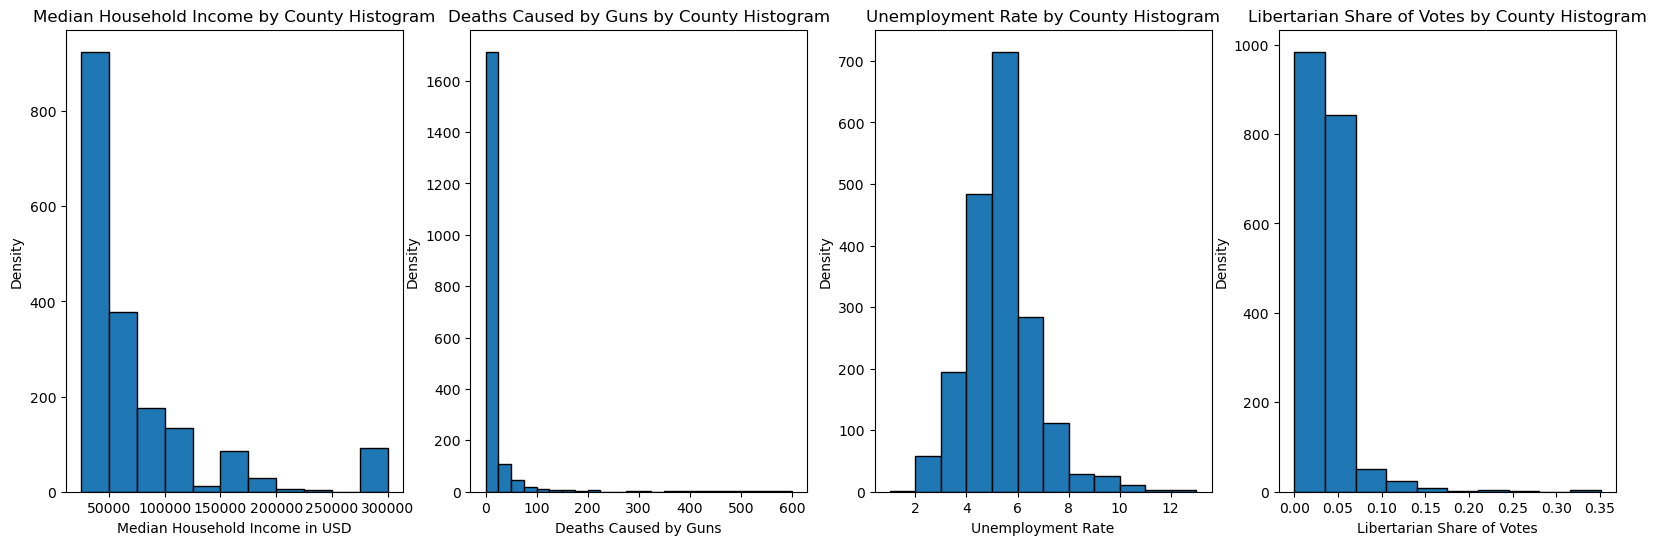

In [11]:
# NOW WE DO SOME VISUALIZATIONS
# HISTOGRAMS FOR THE DEPENDENT AND INDEPENDENT VARIABLES 
fig, axs = plt.subplots(1, 4, figsize=(20, 6))
axs[0].hist(pres_df_merged['Median'], bins = [25000, 50000, 75000, 100000, 125000, 
                                           150000, 175000, 200000, 225000, 250000, 275000, 300000], ec = 'black')
axs[0].set_title('Median Household Income by County Histogram')
axs[0].set_xlabel('Median Household Income in USD')
axs[0].set_ylabel('Density')

axs[1].hist(pres_df_merged['Deaths'], bins = [0, 25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 350, 375, 600]
            , ec = 'black')
axs[1].set_title('Deaths Caused by Guns by County Histogram')
axs[1].set_xlabel('Deaths Caused by Guns')
axs[1].set_ylabel('Density')

axs[2].hist(pres_df_merged['Rate'], bins = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], ec = 'black')
axs[2].set_title('Unemployment Rate by County Histogram')
axs[2].set_xlabel('Unemployment Rate')
axs[2].set_ylabel('Density')

axs[3].hist(pres_df_merged['vote_share_lib'], ec = 'black')
axs[3].set_title('Libertarian Share of Votes by County Histogram')
axs[3].set_xlabel('Libertarian Share of Votes')
axs[3].set_ylabel('Density')

Though there appears to be good variation amongst the results for median household income and unemployment rate, we do not seem to see the same in the variable 'deaths caused by guns by county'. It seems that such deaths are fairly rare in most counties, and in the few cases where there are more, it is usually an outlier, thus this is probably not a good explanatory variable.

Instead, we will add in more 'material' conditions, in this case I believe that education level could potentially be an impactful explanatory variable. The idea behind education level being an explanatory variable is that I expect those with higher levels of education having more critical thinking skills, and thus may be less likely to support the two mainstream political parties.

We will be looking at the most recent set of years before the 2016 election (2007-2011) for the education levels (% of county population that has acquired a bachelors degree or higher). Additionally, if that variables proves to have little variation, we can lower the bar and look at the acquisation of at least a high school diploma.

In [12]:
# We want to clean the data for the education dataset. The way its organized is that there is state name above all the counties
# REMOVE THOSE.
edu_df = pd.read_csv(r'C:\Users\huang\OneDrive\Documents\ECO225\Education.csv')
# Should be able to remove state rows by simply setting 2003 Rural-urban Continuum Code == ''? We can try 
edu_df = edu_df[edu_df['2003 Rural-urban Continuum Code'].notna()]
edu_df = edu_df[['State', 'Area name', "Percent of adults with a bachelor's degree or higher 2007-11"]]
# Set state to not be initials 
us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}
abbrev_to_us_state = dict(map(reversed, us_state_to_abbrev.items()))
edu_df['State'] = edu_df['State'].map(abbrev_to_us_state)
# WE NOW CONDUCT A LEFT MERGE, WITH LEFT TABLE BEING OUTCOME TABLE AND RIGHT BEING THE EDU_DF
pres_df_merged['state_name'] = pres_df_merged.index
ind = 0 
state_list = []
while ind in range(len(pres_df_merged['state_name'])):
    state_list.append(pres_df_merged['state_name'][ind][0])
    ind += 1 
pres_df_merged['state_name'] = state_list
print(pres_df_merged.head())
pres_df_merged = pd.merge(pres_df_merged, edu_df, how = 'left', left_on = ['state_name', 'county_name']
                          , right_on = ['State', 'Area name'])
pres_df_merged = pres_df_merged.drop(columns = ['state_name'])
pres_df_merged.head()


                        votes_x  votes_y      Rate        Median  Deaths  \
state   county_name                                                        
Alabama Autauga County    651.0  37000.0  5.250000  40580.000000     0.0   
        Barbour County    111.0  16512.0  8.150000  29166.000000     0.0   
        Blount County     426.0  38788.0  5.350000  44609.000000    14.0   
        Butler County      78.0  13415.0  5.022917  40684.416667     0.0   
        Calhoun County   1378.0  73438.0  6.534259  24322.750000    33.0   

                        vote_share_lib state_name  
state   county_name                                
Alabama Autauga County        0.017595    Alabama  
        Barbour County        0.006722    Alabama  
        Blount County         0.010983    Alabama  
        Butler County         0.005814    Alabama  
        Calhoun County        0.018764    Alabama  


,votes_x,votes_y,Rate,Median,Deaths,vote_share_lib,State,Area name,Percent of adults with a bachelor's degree or higher 2007-11
0,651.0,37000.0,5.250000,40580.000000,0.0,0.017595,Alabama,Autauga County,21.6
1,111.0,16512.0,8.150000,29166.000000,0.0,0.006722,Alabama,Barbour County,13.9
2,426.0,38788.0,5.350000,44609.000000,14.0,0.010983,Alabama,Blount County,11.3
3,78.0,13415.0,5.022917,40684.416667,0.0,0.005814,Alabama,Butler County,12.4
4,1378.0,73438.0,6.534259,24322.750000,33.0,0.018764,Alabama,Calhoun County,15.8


,votes_x,votes_y,Rate,Median,Deaths,vote_share_lib,Percent of adults with a bachelor's degree or higher 2007-11
count,1920.000000,1.920000e+03,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000
mean,1900.429688,5.106796e+04,5.380204,73060.991581,10.525521,0.037753,19.777396
std,5480.047421,1.448873e+05,1.404795,63065.463427,39.318933,0.025827,8.719473
min,0.000000,1.590000e+02,1.808333,6808.000000,0.000000,0.000000,5.900000
25%,153.750000,5.341000e+03,4.598284,38764.062500,0.000000,0.024262,13.875000
50%,413.000000,1.315450e+04,5.330556,48863.300000,0.000000,0.034439,17.500000
75%,1279.750000,3.602550e+04,5.998059,80621.375000,10.000000,0.045391,23.200000
max,97086.000000,3.434308e+06,17.616667,300000.000000,743.000000,0.350714,63.900000


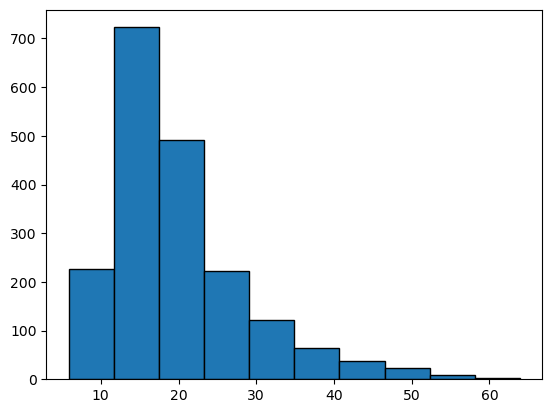

In [26]:
# Histogram for education:
plt.hist(pres_df_merged["Percent of adults with a bachelor's degree or higher 2007-11"], ec = 'black')
pres_df_merged.describe()

# B) Scatterplots with Lines of Best Fit 

We create scatterplots of the dependent variable on the independent variable (y axis for the share of votes for the Libertarian party, x axis for median household income, gun deaths, and unemployment rate by county).

For the scatterplot and the line of best fit of share of votes for the Libertarian party and the median household income by county, we cannot see any discernible trend. It seems that differing material conditions does not seem to have a significant impact on whether or not a county has larger share of votes for the Libertarian party.

There seems to be a more observable downwards trend in the relationship between the share of votes for the Libertarian party and gun deaths by county, ignoring the outliers (counties with signficantly higher gun deaths than 100), it seems that if a county has experienced more gun deaths, there is a smaller amount of support for the Libertarian party.

Lastly, for the scatter plot of share of votes for the Libertarian party and the unemployment rate by county, we find that like the median household income by county, there does not seem to be any significant trend. From our past results, it seems that material conditions do not seem to have an effect on the share of votes for the Libertarian party in the counties that they are active in.

Text(0, 0.5, 'Share of Votes for Libertarian Party')

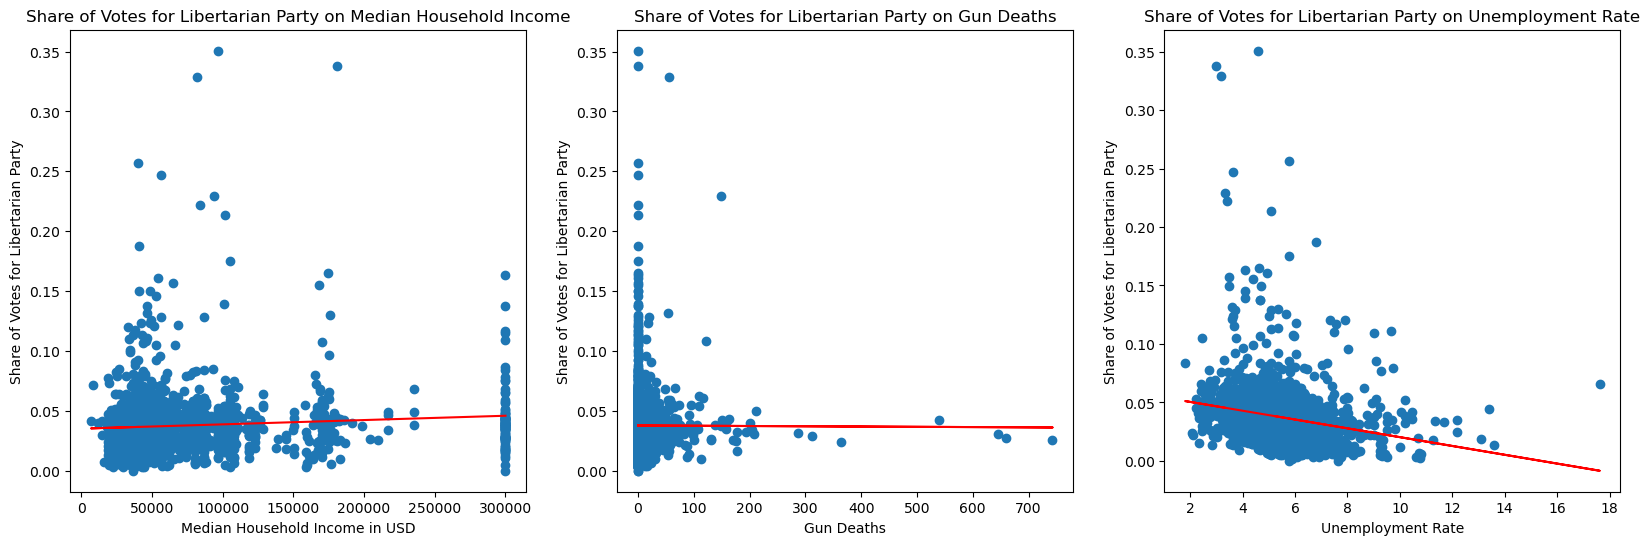

In [14]:
# Linear Graphs, (scatterplot + lines of best fit)
# For median household income:
medhhinc, beta1 = np.polyfit(pres_df_merged['Median'], pres_df_merged['vote_share_lib'], 1)
fig, axs = plt.subplots(1, 3, figsize=(20, 6))

# Scatterplot
axs[0].scatter(pres_df_merged['Median'], pres_df_merged['vote_share_lib'])
# Line of best fit 
axs[0].plot(pres_df_merged['Median'], pres_df_merged['Median']*medhhinc + beta1, color = 'red')
axs[0].set_title('Share of Votes for Libertarian Party on Median Household Income')
axs[0].set_xlabel('Median Household Income in USD')
axs[0].set_ylabel('Share of Votes for Libertarian Party')


# For Deaths caused by guns
deaths, beta2 = np.polyfit(pres_df_merged['Deaths'], pres_df_merged['vote_share_lib'], 1)
# Scatterplot
axs[1].scatter(pres_df_merged['Deaths'], pres_df_merged['vote_share_lib'])
# Line of best fit 
axs[1].plot(pres_df_merged['Deaths'], pres_df_merged['Deaths']*deaths + beta2, color = 'red')
axs[1].set_title('Share of Votes for Libertarian Party on Gun Deaths')
axs[1].set_xlabel('Gun Deaths')
axs[1].set_ylabel('Share of Votes for Libertarian Party')


# For Deaths caused by guns
rate, beta3 = np.polyfit(pres_df_merged['Rate'], pres_df_merged['vote_share_lib'], 1)
# Scatterplot
axs[2].scatter(pres_df_merged['Rate'], pres_df_merged['vote_share_lib'])
# Line of best fit 
axs[2].plot(pres_df_merged['Rate'], pres_df_merged['Rate']*rate + beta3, color = 'red')
axs[2].set_title('Share of Votes for Libertarian Party on Unemployment Rate')
axs[2].set_xlabel('Unemployment Rate')
axs[2].set_ylabel('Share of Votes for Libertarian Party')


# 5. Conclusion

From our initial research on the Libertarian party's performance in the 2016 Presidential Election, we see that in the counties they were active in, they did not seem to perform particularly well, with most of their share of votes being in the 0 to 10% range. Additionally, while we were expecting material conditions to have some kind of impact on the Libertarian party's share of votes across counties, we did not observe any significant trend. This is particularly interesting, as unlike the Democrats and Republicans which have specific groups that support them, we do not observe this in our initial study. This could indicate that Libertarian supporters cannot be categorized in the same vein as either of the mainstream political parties. Lastly, we see that gun deaths by county has a negative impact on the Libertarian party's performance ~ this could be caused by the Libertarian party's lax attitude towards gun safety.

Moving forward, I think it could be more effective to focus on cultural instead of material issues when trying to measure the Libertarian party's performance, as it seems that no particular wealth group seems devoted to the party. Thus, in the future we want to see if voters' support for the party is caused by ideological reasons instead.

# 6. Citations
The following data sources were used:

Eltom, A. (2022, November 21). US gun deaths by county 1999-2019. Kaggle. Retrieved February 2, 2023, from https://www.kaggle.com/datasets/ahmedeltom/us-gun-deaths-by-county-19992019 

Golden Oak Research Group. (2018, April 16). US household income statistics. Kaggle. Retrieved February 2, 2023, from https://www.kaggle.com/datasets/goldenoakresearch/us-household-income-stats-geo-locations 

Tunguz, B. (2021, January 25). US elections dataset. Kaggle. Retrieved February 2, 2023, from https://www.kaggle.com/datasets/tunguz/us-elections-dataset?select=usa-2016-presidential-election-by-county.csv 

Weber, N. (2019, March 20). Analysis of World crime. Kaggle. Retrieved February 2, 2023, from https://www.kaggle.com/code/zikazika/analysis-of-world-crime/data 


# Part 2: Project 2: Do Dissatisfied Voters Vote for Independent Political Parties more Frequently?

# The Message

Previously, in project 1 I was looking at how material conditions within counties may affect the voting preferences of those living in the county, and it would increase the share of votes for the Libertarian party. The initial idea was to measure if dissatisfaction with material conditions made voters more likely to vote for a party that was not with the 'establishment'. Thus I used the most popular third party option. However, it seems that the Libertarian party is far too minor in the political landscape of the US in spite of being the most popular third-party option. Since I am still interested in the outcomes of non-mainstream political parties, I instead chose to group the Libertarian party votes with that of other independent candidates. Despite having very varied positions, I believe that their views are different enough from the two major parties such that people voting for the third-party options do so as a form of protest.

From some feedback on the first stage of the project, I will be ignoring the 'deaths caused by shootings by county', as there is too little variation. Thus, instead of looking at the cultural trends having an impact on the election outcomes by county, I will instead focus solely on the material conditions on the election outcomes. My hypothesis for the material conditions is that they should have more of an impact than cultural factors, as people tend to be more upset when their expectations for material conditions are not met.

# Maps of the United States by Counties where Independent Parties are Active

In this section, I create maps of the United States, with the state borders and county borders (of those where Libertarians and other Independent parties are active in) for both the outcome variable (vote share of independent groups) and the explanatory variables (education levels, household median income, and unemployment rate).

Putting the visualizations onto the map will help us see which geographic regions seem to be experiencing poor/good material conditions, and thus provide us with a more intuitive understanding of the trends in vote shares of the 'indpendent party' group.

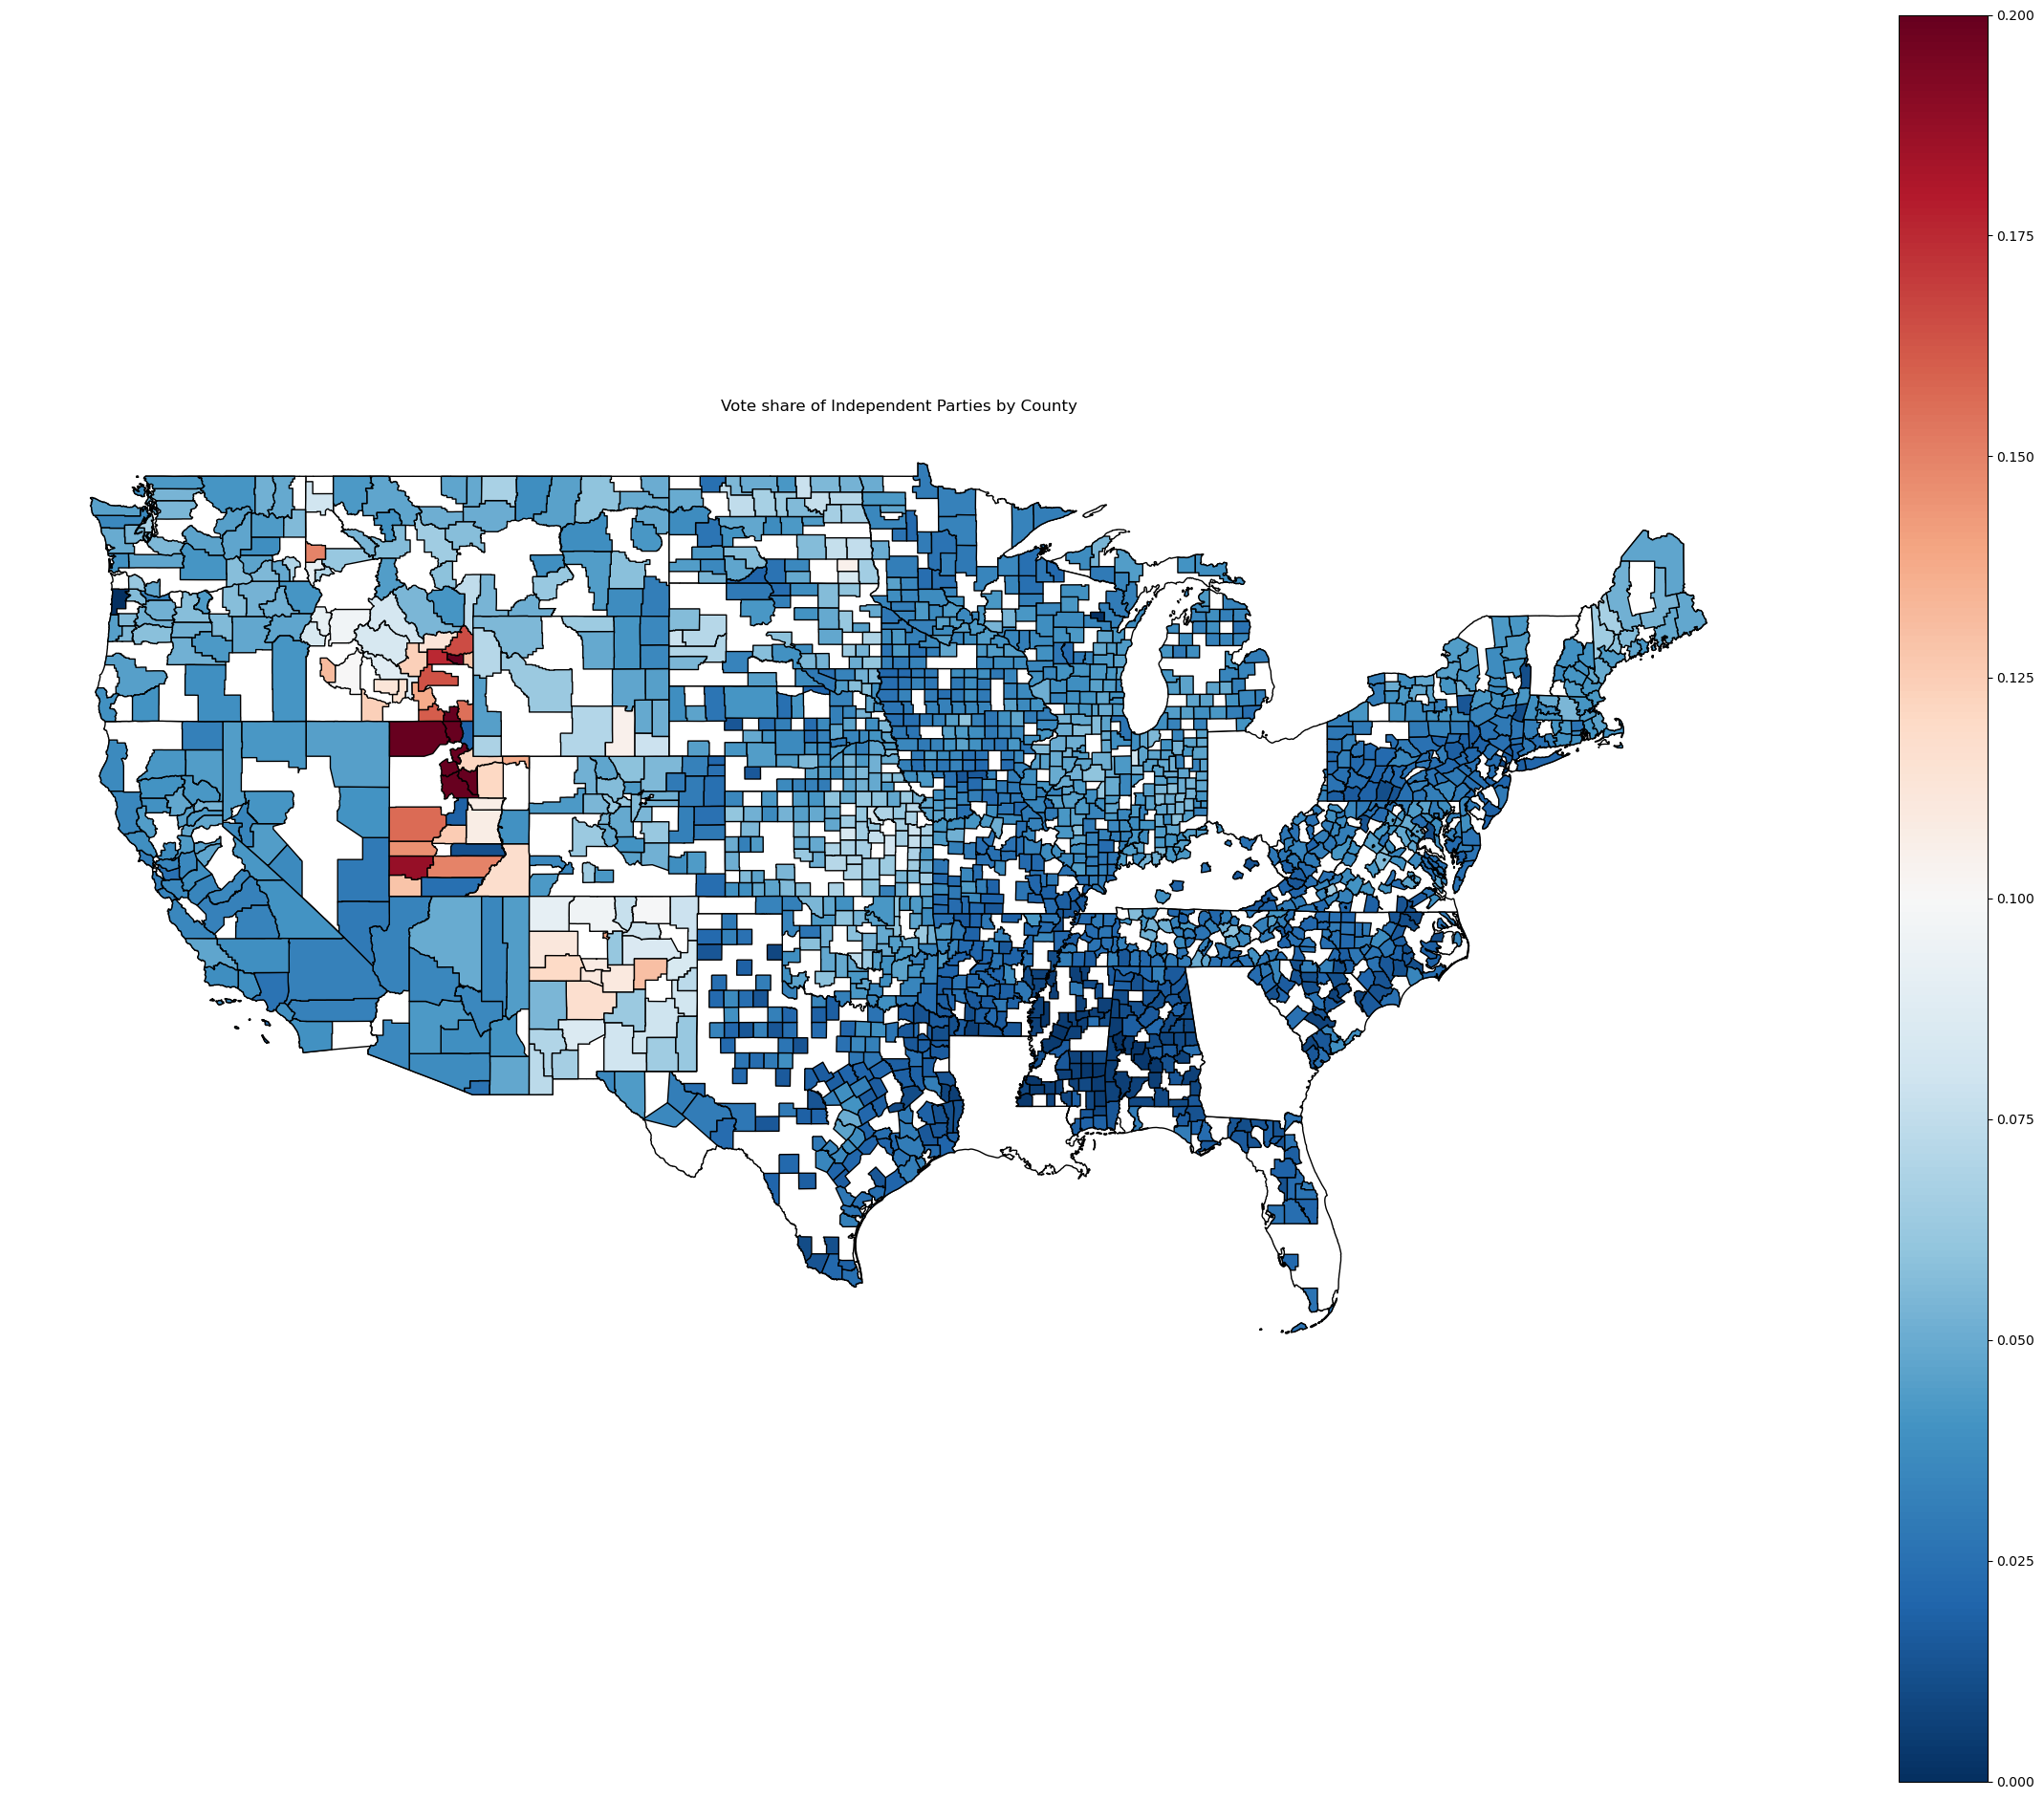

In [41]:
import geopandas as gpd
# We want to plot both state and county lines...
# Probably ignore the faraway states
county_df = gpd.read_file("http://www2.census.gov/geo/tiger/GENZ2016/shp/cb_2016_us_county_5m.zip")
state_df = gpd.read_file("http://www2.census.gov/geo/tiger/GENZ2016/shp/cb_2016_us_state_5m.zip")
# Create a list of states that we are excluding from the map ~ otherwise the map will appear much smaller and harder to read
# We've managed to remove most of 
not_allow = ['02', '60', '66', '69', '72', '78', '15']
# Try plotting out them states I tell you hwat 
fig, gax = plt.subplots(figsize = (30,24))
# State df remove those far away:
state_df = state_df.query('STATEFP not in @not_allow')
state_df.plot(ax = gax, edgecolor='black',color='white')
# Set up dataframe to contain results and geo data:
county_list = []
for item in county_df['NAME']:
    county_list.append(item + ' County')
county_df['county_name'] = county_list
geo_df = state_df.merge(county_df, how = 'left', left_on = ['STATEFP'], right_on = ['STATEFP'])
geo_df_results = geo_df.merge(pres_df_merged, how = 'left', left_on = ['NAME_x', 'county_name']
                              , right_on = ['State', 'Area name'])
geo_df_results.dropna(inplace = True)
# Convert back to geodataframe
geo_df_results = gpd.GeoDataFrame(geo_df_results, geometry="geometry_y")
geo_df_results = geo_df_results[['county_name', 'geometry_y', 'Rate', 'Median'
                                 , "Percent of adults with a bachelor's degree or higher 2007-11", 'vote_share_lib']]

# Now we plot the counties and results:
# This map is for the outcome variable (share of votes for independents + libertarians)
geo_df_results.plot(
    ax=gax, edgecolor='black', column='vote_share_lib', legend=True, cmap='RdBu_r',
    vmin=0.0, vmax=0.2 #range of your column value for the color legend
)
gax.set_title('Vote share of Independent Parties by County')
plt.axis('off')
plt.show()

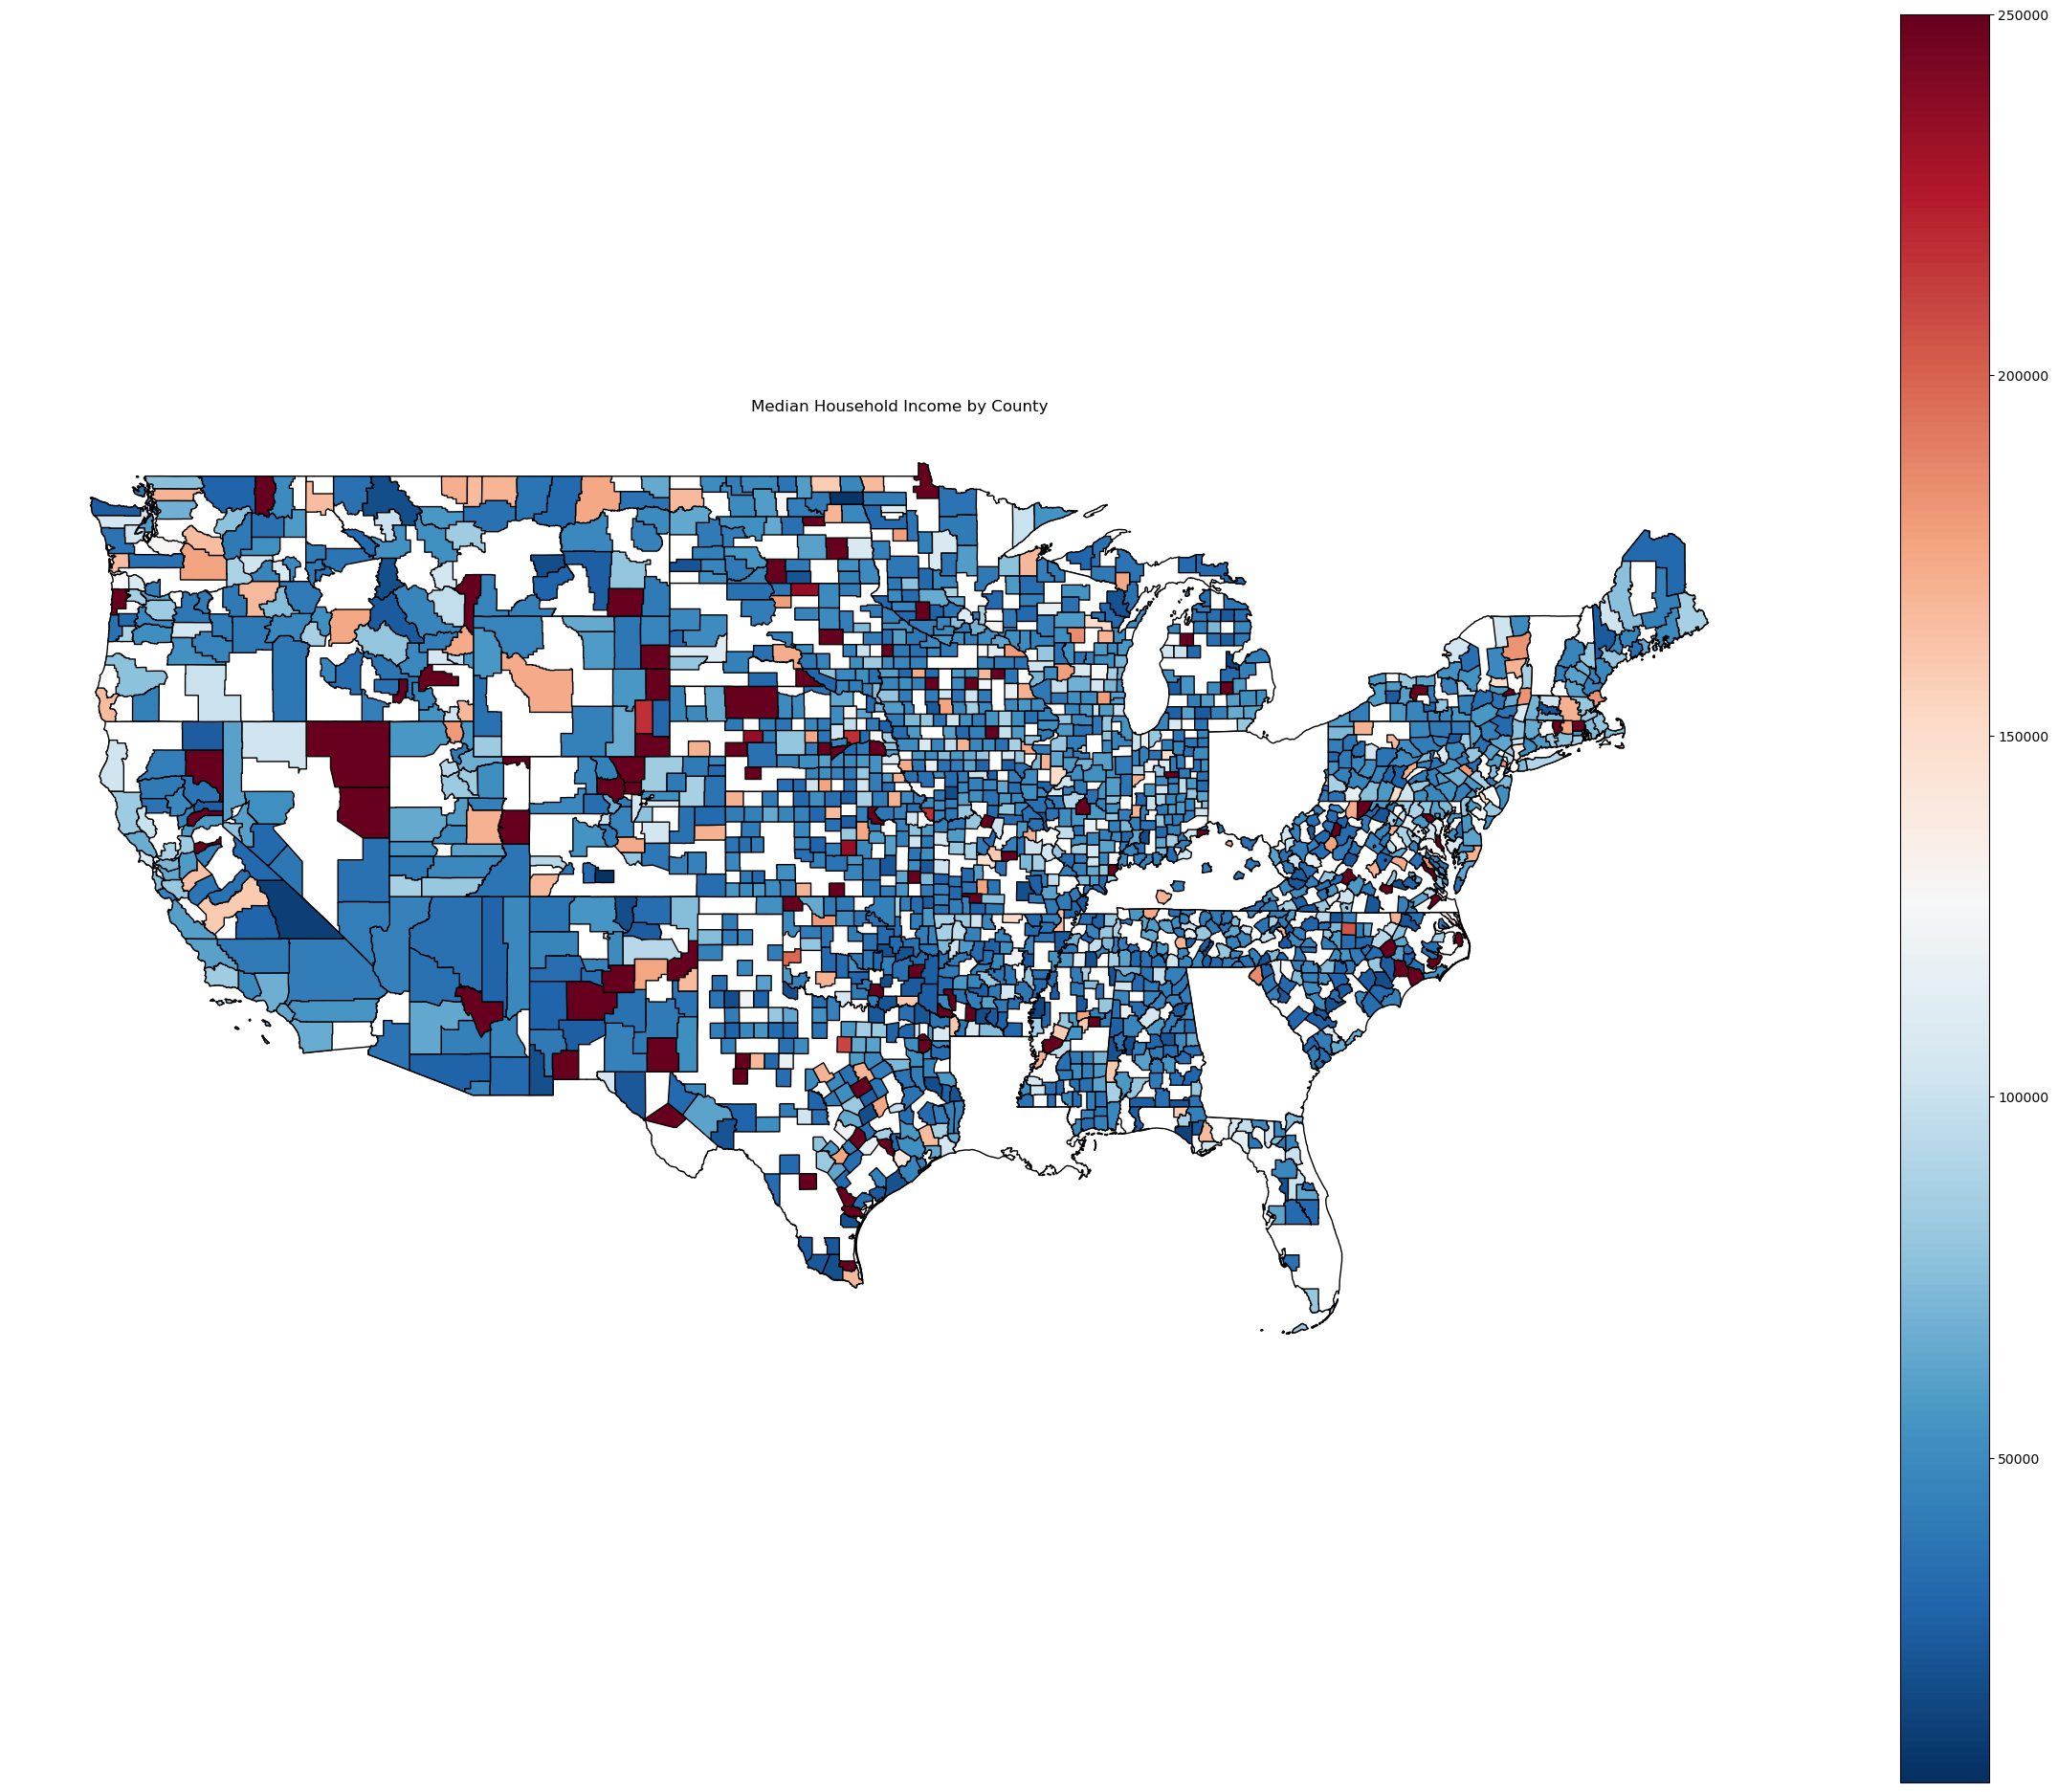

In [35]:
# For median household income 
fig, gax = plt.subplots(figsize = (30,24))
state_df.plot(ax = gax, edgecolor='black',color='white')
geo_df_results.plot(
    ax=gax, edgecolor='black', column='Median', legend=True, cmap='RdBu_r',
    vmin=5000, vmax=250000 #range of your column value for the color legend
)
gax.set_title('Median Household Income by County')
plt.axis('off')
plt.show()

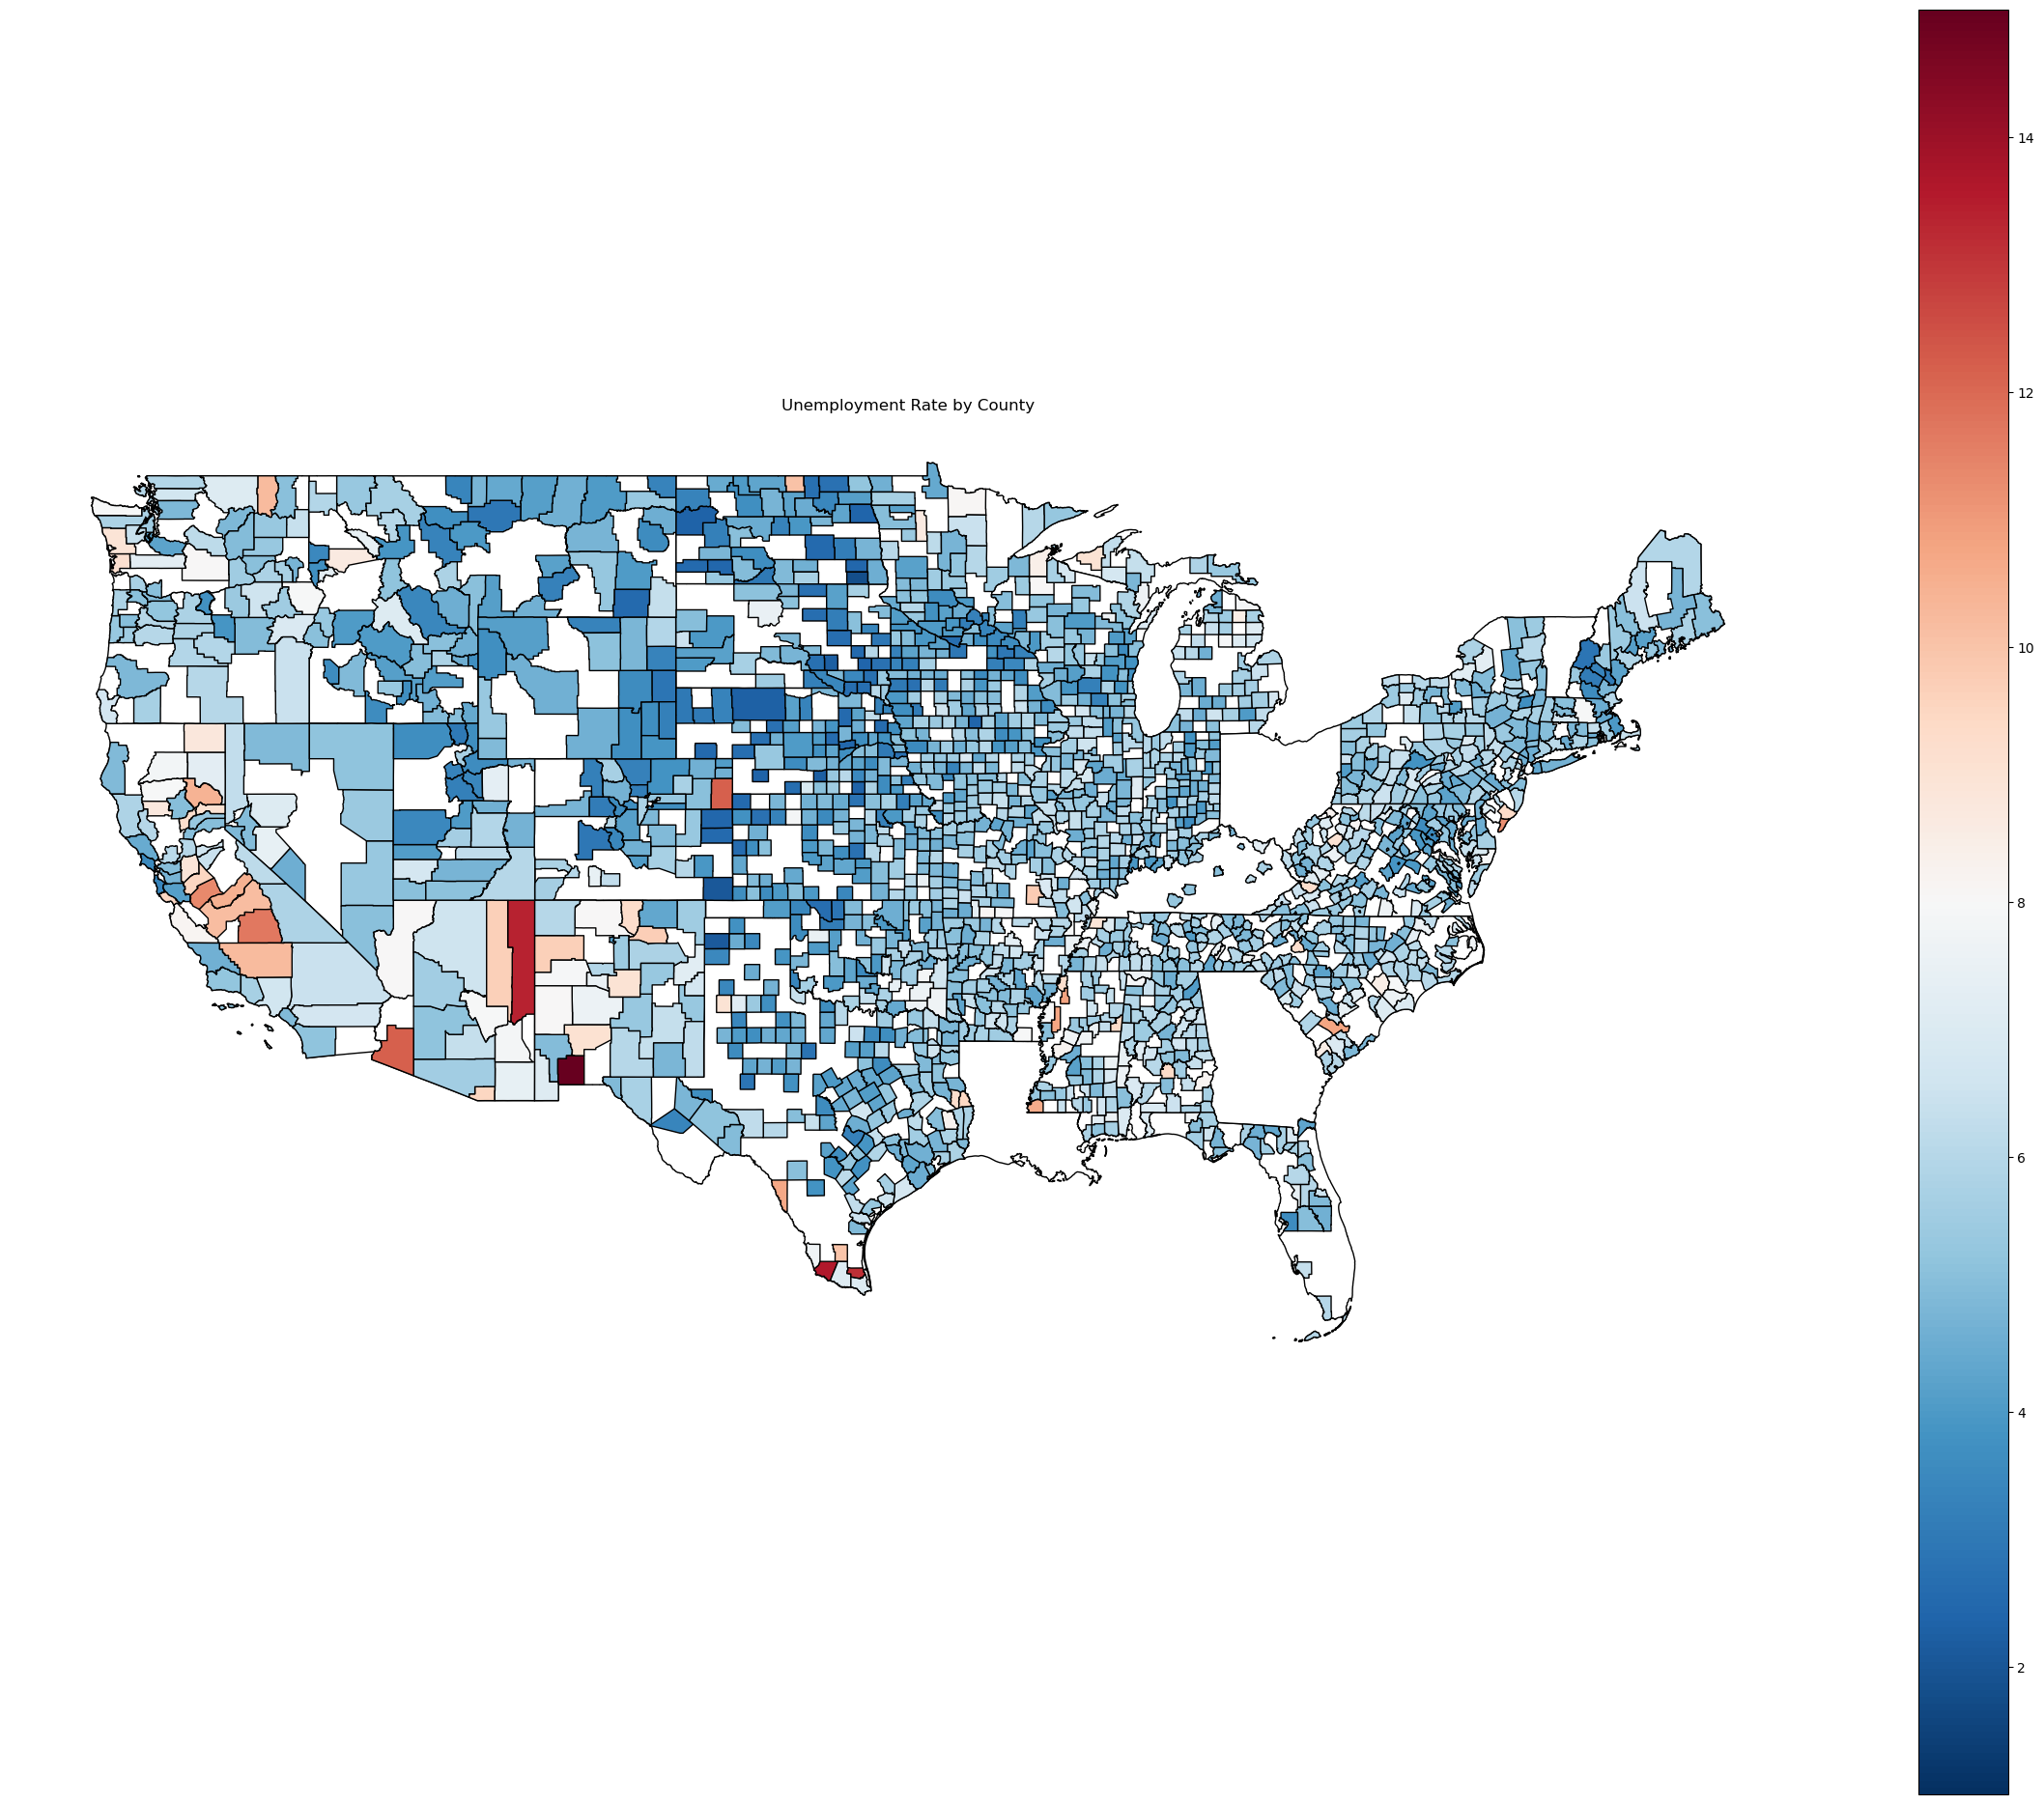

In [34]:
# For unemployment rate
fig, gax = plt.subplots(figsize = (30,24))
state_df.plot(ax = gax, edgecolor='black',color='white')
geo_df_results.plot(
    ax=gax, edgecolor='black', column='Rate', legend=True, cmap='RdBu_r',
    vmin=1, vmax=15 #range of your column value for the color legend
)
gax.set_title('Unemployment Rate by County')
plt.axis('off')
plt.show()

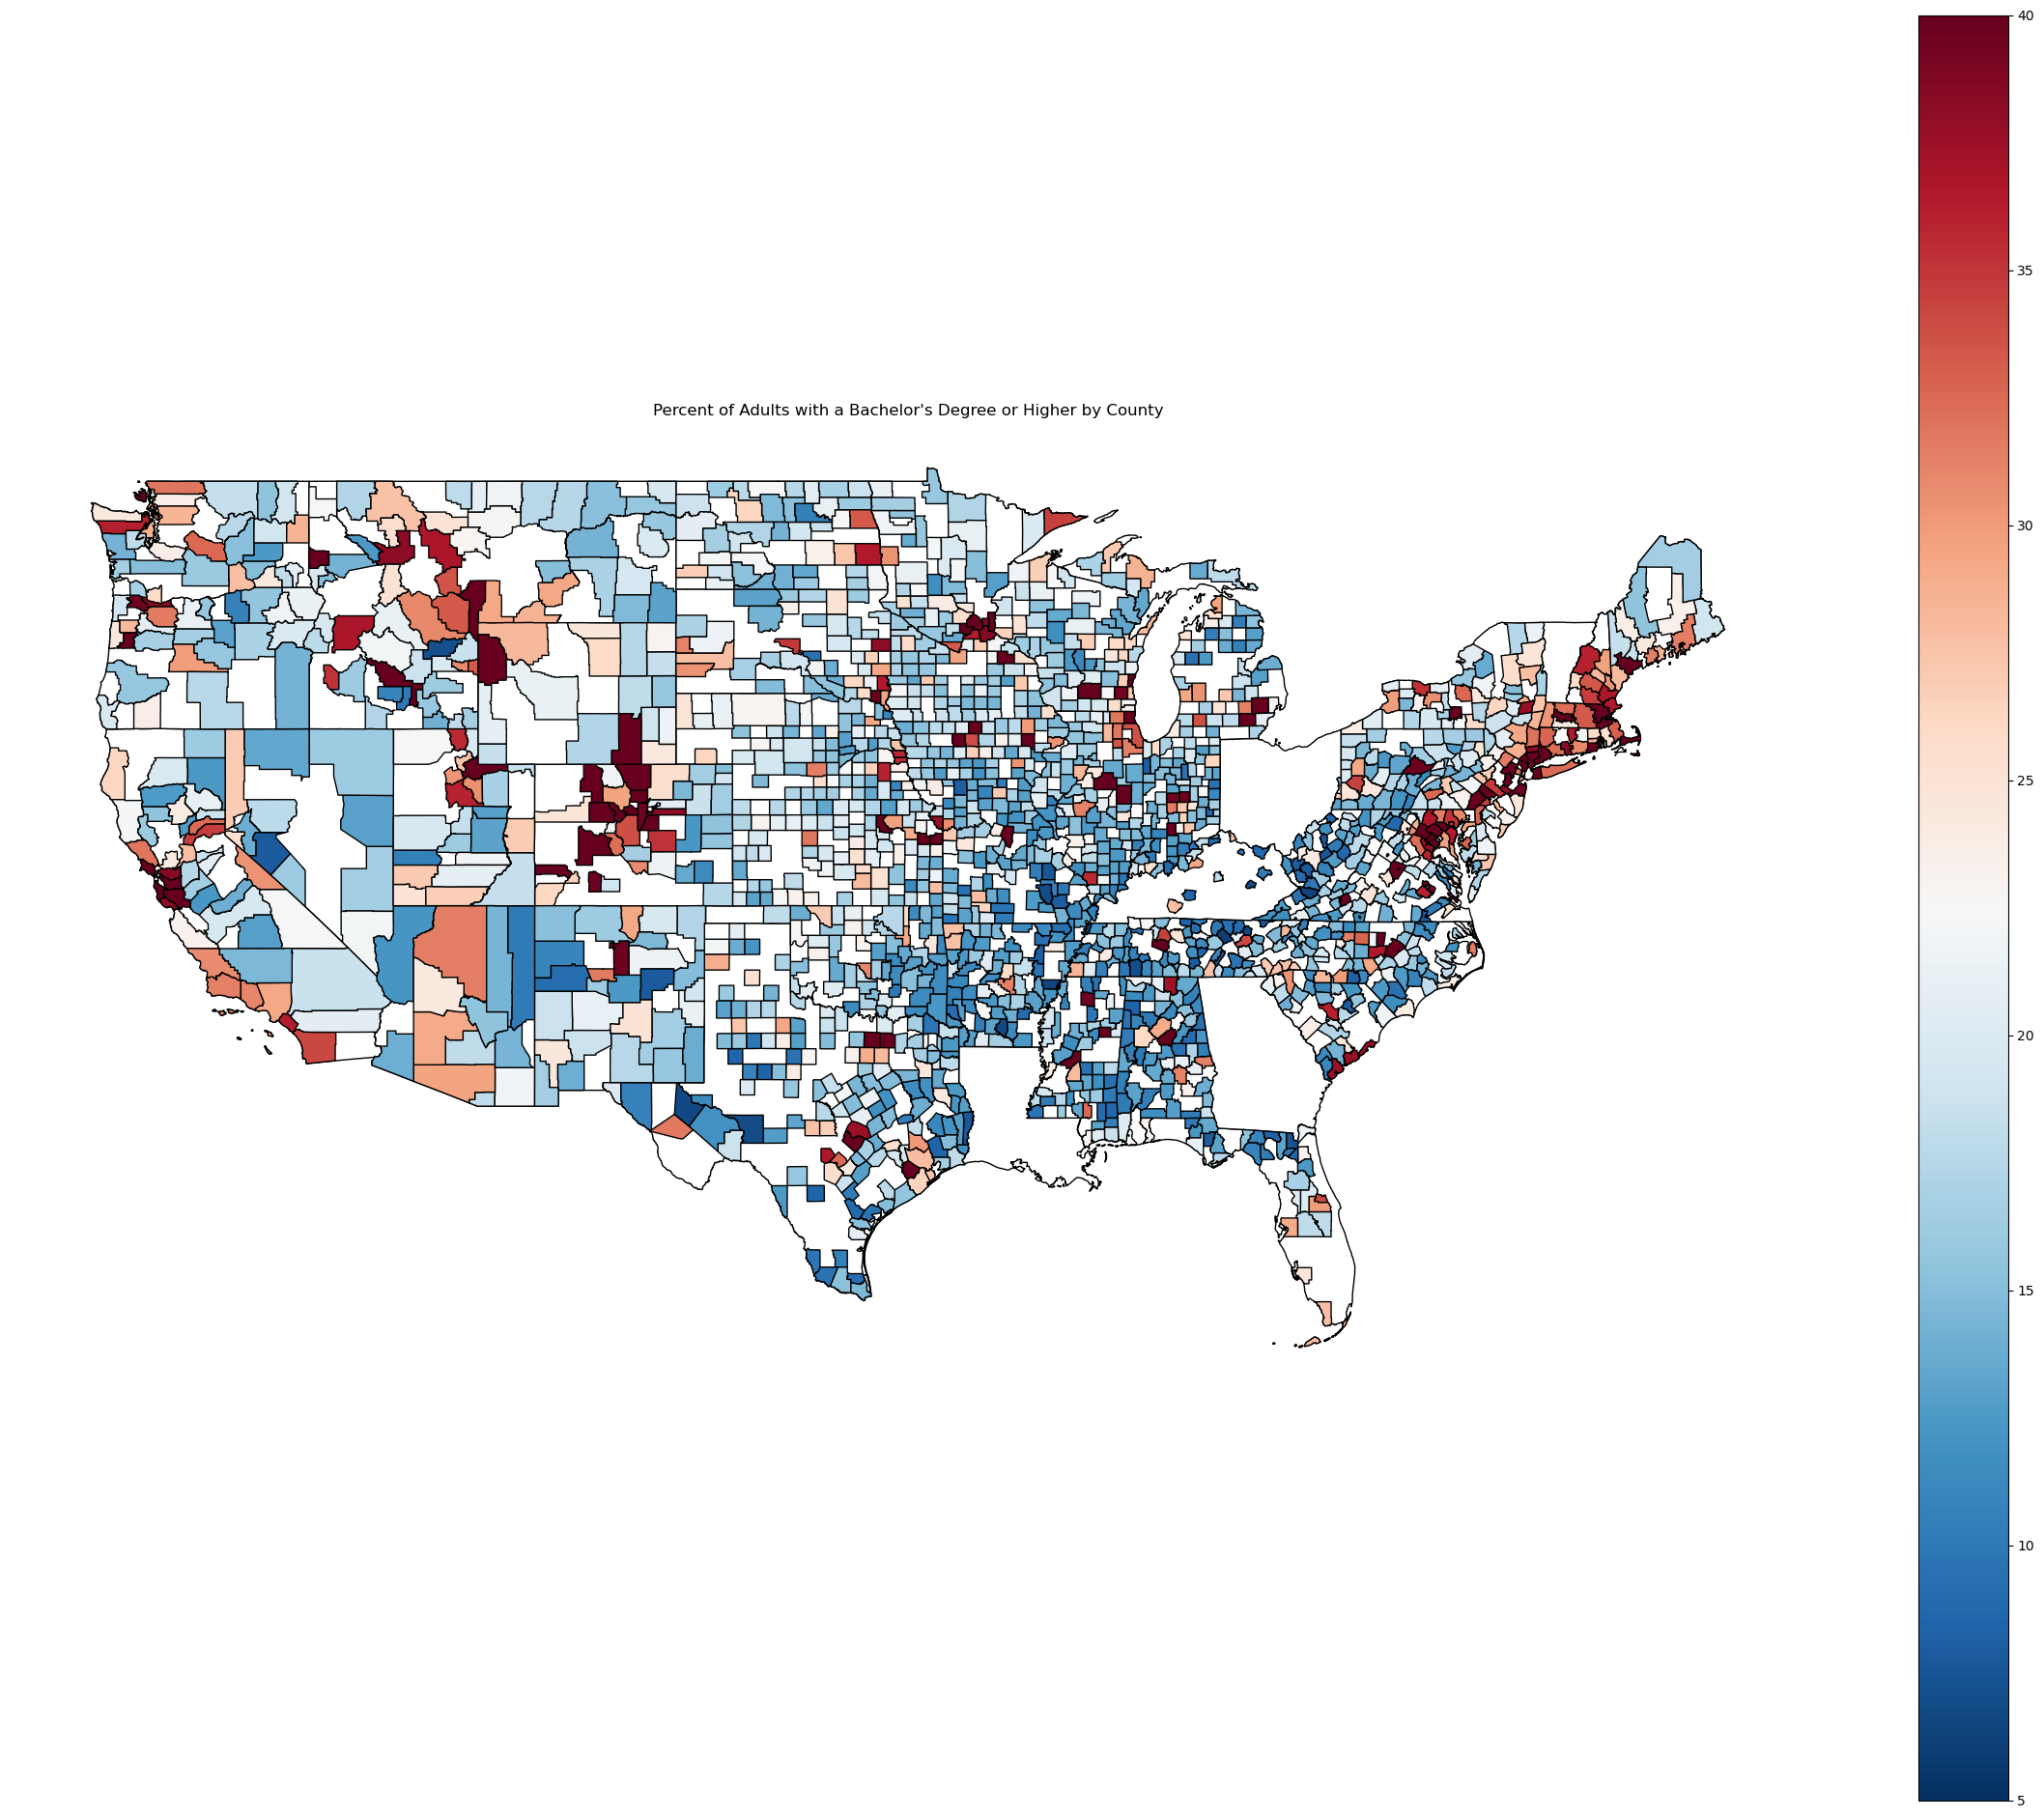

In [36]:
# For education rate...
fig, gax = plt.subplots(figsize = (30,24))
state_df.plot(ax = gax, edgecolor='black',color='white')
geo_df_results.plot(
    ax=gax, edgecolor='black', column="Percent of adults with a bachelor's degree or higher 2007-11", legend=True, cmap='RdBu_r',
    vmin=5, vmax=40 #range of your column value for the color legend
)
gax.set_title("Percent of Adults with a Bachelor's Degree or Higher by County")
plt.axis('off')
plt.show()

# Map Explanations

_Standout States: Noticeable Independent Party Vote Shares_

In most of the counties in different states in the US, we see that independent parties tend to have little to no (0 to 5% of votes in a county) presence. However, in certain states these independent parties have a much more significant impact (10 to 45% of votes in a county) where they are able to either change the outcome for the major political parties, or win the vote in the county themselves.

These states are Utah, New Mexico and Idaho, which stood out given their outcome ~ where they had 10 to 45% of the votes in the county. Apart from that, it seems that the west coast generally have a higher percentage of votes for independent parties in their counties (generally 5 to 10% of the votes). Whereas in the east coast and the south we see that the share of votes tends towards the 0 to 4% range.

Utah, from research, seems to have had a particular high percentage of the votes belong to an independent party within most of their counties since a former Republican candidate, Evan McMullin, decided to split off and run as an independent candidate with more of a focus on his religious background as a Mormon. Given that the religious demographic of Utah (66% of the populace in Utah being Mormons) heavily favors Mormons, it is less due to the material conditions in this case, but seems to be more focused on the cultural aspect resulting in the success of this independent political group. In the future, if we have the chance to incorporate any cultural measures such as religion. 

In the cases of New Mexico, we see that Libertarians (in total, across all counties) managed to acquire 24 percent of all the votes, thus while not significant enough to secure a victory within the state, has shown that their success could be attributed more towards their ideology instead of the material conditions ~ seeing as they are most successful in the counties where the median household income was on the higher end of the spectrum.

For Idaho, the most popular independent party was headed by Evan McMullin, who managed to garner some support from the Mormon populace. However, Trump still won in most of the counties within Idaho.

_Additional Observations:_

In the other parts of the country, in particular the east coast and the south, we see that there is very little support for independent political parties relative to the west coast, alongside the standout states (Idaho, Utah, and New Mexico). In part, the east coast is known to heavily favor the Democrats, and the south to favor the Republicans.

Additionally, in terms of higher education, it appears as though the east coast has a particular noteable portion of the population having completed at least a bachelors degree. In those areas, we see that there is relatively low support for independent parties. While we may draw the conclusion that a more educated populace may not be supportive of smaller political parties, we observe that along the east coast in similarily highly educated counties, that there is more support for these independent parties. Thus, it could have more to do with the cultural allegiance to the Democrats party instead of the material conditions being of higher quality.
